# Covid19 - Counties Dataset
### The novel coronavirus has had huge implications to the world around us and how we live our day-to-day lives. In this notebook I'd like to explore how the coronavirus has spread over time especially around where I live in Northern New Jersey. As this area borders NYC, the new epicenter of the virus New Jersey is not surprisingly the state with the second most confirmed cases at the time of this analysis.

#### It's important to be mindful that these are confirmed cases which may or may not be indicative of the actual infections. Availability of testing kits and hospitals that allow testing for covid19 are scarce and it's hard to say if some parts of America test less than other places. 

#### Throughout the notebook I'll be commenting my train of thought which should translate to why I go a certain path with the analysis. The data used here is provided through the New York Times. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import data
data = pd.read_csv('dataset/us-counties.csv')

# preview the data
print('Number of data points:', data.shape[0])
data.head()

Number of data points: 30843


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [2]:
# check if empty entries exist
data.isnull().sum()

date        0
county      0
state       0
fips      455
cases       0
deaths      0
dtype: int64

There seems to be some blank entries for the column fips which is a unique code for each county. As we'll only be doing analysis on the county and states we can omit the fips column entirely for the purposes of this analysis.

In [3]:
# remove fips column
data.drop('fips', axis=1, inplace=True)

Let's run some explaratory analysis now we know this data is in a usable state.

In [4]:
# min/max dates in dataset
print('Min date:', min(data.date))
print('Max date:', max(data.date))
print('')

# number of states in dataset
print('Number of distinct states in dataset:', data.state.nunique())

Min date: 2020-01-21
Max date: 2020-04-03

Number of distinct states in dataset: 55


Um.. 55 distinct states?? We'll have to list them out and vett the list to see what's included. In the case there's typos in the state names we'll have to do additional data cleaning.

In [5]:
for state in sorted(data.state.unique()):
    print(state)

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
District of Columbia
Florida
Georgia
Guam
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Northern Mariana Islands
Ohio
Oklahoma
Oregon
Pennsylvania
Puerto Rico
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virgin Islands
Virginia
Washington
West Virginia
Wisconsin
Wyoming


District of Columbia, Guam, Northern Mariana Islands and Virgin Islands are not typical states, but we'll keep them in the dataset. Let's rank the number of cases and deaths for each of these states.

As we will running analysis on multiple levels of data we'll make a function for adding some useful statistics for the table.

In [6]:
def create_rate_cols(tdf):
    '''Adds death rate, cases percent of total and deaths percent of total columns to a dataframe.'''
    df = tdf.copy()
    sum_cases = sum(df.cases)
    sum_deaths = sum(df.deaths)
    
    # add columns
    df['death_rate'] = df.deaths / df.cases
    df['cases perc. of total'] = df.cases / sum_cases
    df['deaths perc. of total'] = df.deaths / sum_deaths
    
    cols = ['death_rate', 'cases perc. of total', 'deaths perc. of total']
    
    # convert decimals to percentage
    for col in cols:
        df[col] = df[col].astype(float).map('{:.2%}'.format)
    
    return df

In [29]:
# filter for most recent date
state_cd = data[data.date==max(data.date)]

# sum the cases and deaths per state
state_cd = state_cd.groupby('state').sum()[['cases', 'deaths']]

# add stats columns
state_cd = create_rate_cols(state_cd)

# print total cases in America
print('total cases in America:', sum(state_cd.cases))

# print dataframe sorted by death cases
state_cd.sort_values('cases', ascending=False)

total cases in America: 276091


,cases,deaths,death_rate,cases perc. of total,deaths perc. of total
state,,,,,
New York,102945,2935,2.85%,37.29%,41.13%
New Jersey,29895,647,2.16%,10.83%,9.07%
Michigan,12670,478,3.77%,4.59%,6.70%
California,12569,282,2.24%,4.55%,3.95%
Massachusetts,10402,192,1.85%,3.77%,2.69%
Louisiana,10295,370,3.59%,3.73%,5.18%
Florida,10260,169,1.65%,3.72%,2.37%
Illinois,8904,212,2.38%,3.23%,2.97%
Pennsylvania,8402,103,1.23%,3.04%,1.44%


New York has almost 40% of all coronavirus confirmed cases and New York and New Jersey combined have nearly half of all of America's infections. I live right on the border of NY and NJ which is the most heavily populated area in NJ so I assume most of the coronavirus cases are going to be in my county (which is Bergen). For NY I assume most of their cases is in NYC.

In [30]:
# filter for most recent date
df = data[data.date==max(data.date)]

# create dataset of only New York and New Jersey
nyj = df[df.state.isin(['New York', 'New Jersey'])]
nj = df[df.state=='New Jersey']
ny = df[df.state=='New York']

# let's first look at the counties in New Jersey
nj_county = nj.groupby('county').sum().sort_values('cases', ascending=False)

# create rate columns
nj_county = create_rate_cols(nj_county)

# print dataframe
nj_county

,cases,deaths,death_rate,cases perc. of total,deaths perc. of total
county,,,,,
Bergen,4866,132,2.71%,16.28%,20.40%
Unknown,4805,4,0.08%,16.07%,0.62%
Essex,3067,118,3.85%,10.26%,18.24%
Hudson,2835,59,2.08%,9.48%,9.12%
Union,2487,45,1.81%,8.32%,6.96%
Passaic,2216,34,1.53%,7.41%,5.26%
Middlesex,2125,56,2.64%,7.11%,8.66%
Monmouth,1743,48,2.75%,5.83%,7.42%
Ocean,1685,45,2.67%,5.64%,6.96%


Looks like there's an unknown category for county which may be due to lack of information from the source. We'll remove the unknown county entries for now to not skew the percentages, but also be aware we're removing some of the data from the dataset.

In [31]:
# recreate dataframe with New Jersey counties
nj_county = nj.groupby('county').sum().sort_values('cases', ascending=False)

# remove unknown county label
nj_county = nj_county[nj_county.index!='Unknown']

# create rate columns
nj_county = create_rate_cols(nj_county)

# print dataframe
nj_county

,cases,deaths,death_rate,cases perc. of total,deaths perc. of total
county,,,,,
Bergen,4866,132,2.71%,19.39%,20.53%
Essex,3067,118,3.85%,12.22%,18.35%
Hudson,2835,59,2.08%,11.30%,9.18%
Union,2487,45,1.81%,9.91%,7.00%
Passaic,2216,34,1.53%,8.83%,5.29%
Middlesex,2125,56,2.64%,8.47%,8.71%
Monmouth,1743,48,2.75%,6.95%,7.47%
Ocean,1685,45,2.67%,6.72%,7.00%
Morris,1298,43,3.31%,5.17%,6.69%


So the first known county of most cases is Bergen county.. where I live. It is a little more spread out than I would've guessed however as I thought the percentage of cases in Bergen county would've been much more than 20.81% of total cases in New Jersey.

Let's now look at New York at their counties.

In [32]:
# recreate dataframe with New Jersey counties
ny_county = ny.groupby('county').sum().sort_values('cases', ascending=False)

# remove unknown county label
ny_county = ny_county[ny_county.index!='Unknown']

# create rate columns
ny_county = create_rate_cols(ny_county)

# print dataframe
ny_county

,cases,deaths,death_rate,cases perc. of total,deaths perc. of total
county,,,,,
New York City,57160,1867,3.27%,55.54%,80.23%
Westchester,12350,67,0.54%,12.00%,2.88%
Nassau,12024,138,1.15%,11.68%,5.93%
Suffolk,10154,96,0.95%,9.87%,4.13%
Rockland,4289,42,0.98%,4.17%,1.80%
Orange,2397,30,1.25%,2.33%,1.29%
Dutchess,809,9,1.11%,0.79%,0.39%
Erie,802,22,2.74%,0.78%,0.95%
Monroe,464,14,3.02%,0.45%,0.60%


New York City has 57% of the cases in the state of New York and 423,482 confirmed cases which is a staggering number. A quick look at the census data provided by NYC open data says for 2020 there's approximately 8,550,971 people living in NYC. 

This means 4.95% of the people living in NYC today are confirmed to have covid19.

In [33]:
ny_county.head().reset_index()

,county,cases,deaths,death_rate,cases perc. of total,deaths perc. of total
0,New York City,57160,1867,3.27%,55.54%,80.23%
1,Westchester,12350,67,0.54%,12.00%,2.88%
2,Nassau,12024,138,1.15%,11.68%,5.93%
3,Suffolk,10154,96,0.95%,9.87%,4.13%
4,Rockland,4289,42,0.98%,4.17%,1.80%


Text(0.5, 1.0, 'Top 5 New Jersey Counties with Covid19')

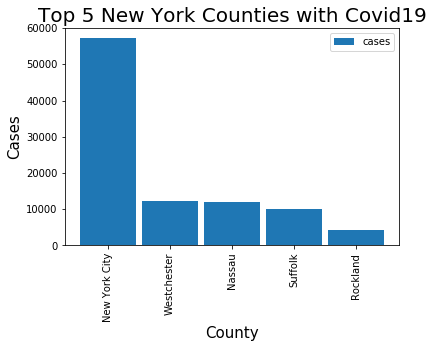

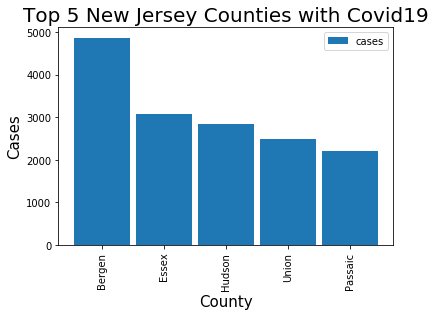

In [34]:
# plot top 5 counties of NY and NJ

# top 5 ny counties
ax1 = ny_county.head().reset_index().plot.bar(x='county', y='cases', width=0.9)
ax1.set_ylabel('Cases', fontsize=15)
ax1.set_xlabel('County', fontsize=15)
ax1.set_title('Top 5 New York Counties with Covid19', fontsize=20)

# top 5 nj counties
ax2 = nj_county.head().reset_index().plot.bar(x='county', y='cases', width=0.9)
ax2.set_ylabel('Cases', fontsize=15)
ax2.set_xlabel('County', fontsize=15)
ax2.set_title('Top 5 New Jersey Counties with Covid19', fontsize=20)